# Working with NLTK and spacy

In this notebook we'll do some analyses of the files we got from the COVID19 IIPC collection. It is based on the [original code from Nick Ruest and the Archive Unleashed team](https://github.com/archivesunleashed/notebooks).


# Loading our website content Datasets as DataFrames

---



Next, we'll setup our datasets as pandas DataFrames to work with, and show a preview of each using the Data Table Display.

Each block of derivative commands create a variable. That variable is a DataFrame with all of the information from a given derivative. After the DataFrame is created, a preview of it is shown.

Provides the following columns:

* crawl date
* web domain
* URL
* MIME type as provided by the web server
* MIME type as detected by Apache TIKA
* content (HTTP headers and HTML removed)

**This file is HUGE! Be patient!**

In [4]:
import pandas as pd

In [5]:
web_pages = pd.read_csv("data/webpage_FR.csv")
web_pages

crawl_date                domain  \
0         20200309  googletagmanager.com   
1         20200310               oie.int   
2         20200310               fao.org   
3         20200310  googletagmanager.com   
4         20200310      merckmanuals.com   
...            ...                   ...   
254347    20200421            pasteur.fr   
254348    20200421                cps.ca   
254349    20200421         go.pardot.com   
254350    20200421           inspq.qc.ca   
254351    20200421              cibc.com   

                                                      url  \
0       https://www.googletagmanager.com/ns.html?id=GT...   
1       https://www.oie.int/fr/expertise-scientifique/...   
2                        http://www.fao.org/2019-ncov/fr/   
3       https://www.googletagmanager.com/ns.html?id=GT...   
4       https://www.merckmanuals.com/fr-ca/accueil/new...   
...                                                   ...   
254347  https://www.pasteur.fr/fr/nous-soutenir/covid-...   
254348             https://www.cps.ca/fr/search-recherche   
254349     https://go.pardot.com/l/375732/2017-07-24/275x   
254350  https://www.inspq.qc.ca/publications/2906-pci-...   
254351  https://www.cibc.com/fr/business/covid-19/emer...   

       mime_type_web_server         mime_type_tika language  \
0                 text/html              text/html       fr   
1                 text/html  application/xhtml+xml       fr   
2                 text/html  application/xhtml+xml       fr   
3                 text/html              text/html       fr   
4                 text/html              text/html       fr   
...                     ...                    ...      ...   
254347            text/html              text/html       fr   
254348            text/html              text/html       fr   
254349            text/html              text/html       fr   
254350            text/html              text/html       fr   
254351            text/html              text/html       fr   

                                                  content  
0                                                      ns  
1       Questions et réponses sur le COVID-19: OIE - W...  
2       Nouveau coronavirus (2019-nCoV) | FAO | Organi...  
3                                                      ns  
4       Épidémie due à un nouveau coronavirus chez l’h...  
...                                                   ...  
254347  Covid-19 : comment soutenir les recherches de ...  
254348  Résultats de la recherche | Société canadienne...  
254349                                     Email Comments  
254350  COVID-19 : Mesures de prévention et de contrôl...  
254351  Compte d’urgence pour les entreprises canadien...  

[254352 rows x 7 columns]

# Text Analysis

Now that we have all of our datasets loaded up, we can begin to work with them!

In [6]:
import altair as alt

In [7]:
import re

import nltk

In [8]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/frederic.clavert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/frederic.clavert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/frederic.clavert/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

We'll drop the `NaN` values in our DataFrame to clean things up a bit.

In [10]:
web_pages = web_pages.dropna()
web_pages

crawl_date                domain  \
0         20200309  googletagmanager.com   
1         20200310               oie.int   
2         20200310               fao.org   
3         20200310  googletagmanager.com   
4         20200310      merckmanuals.com   
...            ...                   ...   
254347    20200421            pasteur.fr   
254348    20200421                cps.ca   
254349    20200421         go.pardot.com   
254350    20200421           inspq.qc.ca   
254351    20200421              cibc.com   

                                                      url  \
0       https://www.googletagmanager.com/ns.html?id=GT...   
1       https://www.oie.int/fr/expertise-scientifique/...   
2                        http://www.fao.org/2019-ncov/fr/   
3       https://www.googletagmanager.com/ns.html?id=GT...   
4       https://www.merckmanuals.com/fr-ca/accueil/new...   
...                                                   ...   
254347  https://www.pasteur.fr/fr/nous-soutenir/covid-...   
254348             https://www.cps.ca/fr/search-recherche   
254349     https://go.pardot.com/l/375732/2017-07-24/275x   
254350  https://www.inspq.qc.ca/publications/2906-pci-...   
254351  https://www.cibc.com/fr/business/covid-19/emer...   

       mime_type_web_server         mime_type_tika language  \
0                 text/html              text/html       fr   
1                 text/html  application/xhtml+xml       fr   
2                 text/html  application/xhtml+xml       fr   
3                 text/html              text/html       fr   
4                 text/html              text/html       fr   
...                     ...                    ...      ...   
254347            text/html              text/html       fr   
254348            text/html              text/html       fr   
254349            text/html              text/html       fr   
254350            text/html              text/html       fr   
254351            text/html              text/html       fr   

                                                  content  
0                                                      ns  
1       Questions et réponses sur le COVID-19: OIE - W...  
2       Nouveau coronavirus (2019-nCoV) | FAO | Organi...  
3                                                      ns  
4       Épidémie due à un nouveau coronavirus chez l’h...  
...                                                   ...  
254347  Covid-19 : comment soutenir les recherches de ...  
254348  Résultats de la recherche | Société canadienne...  
254349                                     Email Comments  
254350  COVID-19 : Mesures de prévention et de contrôl...  
254351  Compte d’urgence pour les entreprises canadien...  

[254352 rows x 7 columns]

We need to set the [`mode.chained_assignment`](https://pandas.pydata.org/docs/user_guide/options.html?highlight=chained_assignment) to `None` now to silence some exception errors that will come up.

In [11]:
pd.options.mode.chained_assignment = None

Next, we'll setup a tokenizer which will split on words, and create a new column which is the tokenized text.

In [12]:
tokenizer = nltk.RegexpTokenizer(r"\w+")

In [13]:
web_pages["content_tokenized"] = web_pages["content"].map(tokenizer.tokenize)

Now well create a column with the tokenized value count.

In [14]:
web_pages["content_tokens"] = web_pages["content_tokenized"].apply(lambda x: len(x))

## Basic word count statistics with pandas!

Now we can use the power of pandas [Statisitcal functions](https://pandas.pydata.org/docs/user_guide/computation.html) to show us some basic statistics about the tokens.

**Mean**

In [15]:
web_pages["content_tokens"].mean()

909.3003082342581

**Standard deviation**


In [16]:
web_pages["content_tokens"].std()

1907.408381786858

**Max**

In [17]:
web_pages["content_tokens"].max()

125720

**Min**

In [18]:
web_pages["content_tokens"].min()

0

## Pages with most words

Let's create a bar chart that shows the pages with the most words. Here we can see the power of pandas at work, in terms of both analysis and visualization.

First, let's show the query to get the data for our chart.

In [19]:
word_count = (
    web_pages[["url", "content_tokens"]]
    .sort_values(by="content_tokens", ascending=False)
    .head(25)
)

In [20]:
word_count

url  content_tokens
16265   https://www.syndicat-infirmier.com/spip.php?pa...          125720
219920  https://www.syndicat-infirmier.com/spip.php?pa...          125669
210539  http://www.assemblee-nationale.fr/13/rap-enq/r...          115094
110183  https://livresdefemmeslivresdeverites.blogspot...           97616
24165            https://rlv.quentinleclerc.com/2016.html           83289
209741  https://blog.lefigaro.fr/rioufol/2020/02/bloc-...           72199
209978  https://blog.lefigaro.fr/rioufol/2020/01/bloc-...           70079
18260        https://www.fmfpro.org/spip.php?page=backend           68778
208617               https://flashmatin.lefigaro.fr/sante           68709
136031  https://fr.wikipedia.org/w/index.php?title=Br%...           67747
24123            https://rlv.quentinleclerc.com/2014.html           67161
24124            https://rlv.quentinleclerc.com/2015.html           65599
210533  https://www.senat.fr/rap/r09-685-1/r09-685-1_m...           64230
210114  https://blog.lefigaro.fr/rioufol/2020/01/bloc-...           63576
24212            https://rlv.quentinleclerc.com/2017.html           62755
210152  https://blog.lefigaro.fr/rioufol/2020/01/bloc-...           62744
203851  https://patents.google.com/patent/EP1694829B1/...           54070
203842   https://patents.google.com/patent/EP1694829B1/fr           54070
203853  https://patents.google.com/patent/EP1694829B1/...           54070
203841  https://patents.google.com/patent/EP1694829B1/fr/           54070
203850  https://patents.google.com/patent/EP1694829B1/...           54070
203840  https://patents.google.com/patent/EP1694829B1/fr/           54070
203843  https://patents.google.com/patent/EP1694829B1/...           54070
203844  https://patents.google.com/patent/EP1694829B1/...           54070
203849  https://patents.google.com/patent/EP1694829B1/...           54070

Next, let's create a bar chart of this.

In [22]:
word_count_bar = (
    alt.Chart(word_count)
    .mark_bar()
    .encode(x=alt.X("url:O", sort="-y"), y=alt.Y("content_tokens:Q"))
)

word_count_rule = (
    alt.Chart(word_count).mark_rule(color="red").encode(y="mean(content_tokens):Q")
)

word_count_text = word_count_bar.mark_text(align="center", baseline="bottom").encode(
    text="content_tokens:Q"
)

(word_count_bar + word_count_rule + word_count_text).properties(
    width=1400, height=700, title="Pages with the most words"
)

alt.LayerChart(...)

## How about NER on the page with the most tokens?

[Named-Entity Recognition](https://en.wikipedia.org/wiki/Named-entity_recognition), or NER, is an exciting field of natural language processing that lets us extract "entities" out of text; the names of people, locations, or organizations.

To do this, we first need to find the pages that have the most tokens.

In [23]:
word_count_max = (
    web_pages[["url", "content_tokens", "content"]]
    .sort_values(by="content_tokens", ascending=False)
    .head(1)
)
word_count_max["url"]

16265    https://www.syndicat-infirmier.com/spip.php?pa...
Name: url, dtype: object

We'll remove the column width limit so we can check out our content for the page.

In [24]:
pd.set_option("display.max_colwidth", None)

Let's take a look at our page's content.

In [25]:
page = word_count_max["content"].astype("unicode").to_string()
page

'16265    SNPI http://www.syndicat-infirmier.com// L\'Actualité du SNPI CFE CGC FR SNPI CFE CGC 2009 snpicfecgc@yahoo.frm snpicfecgc@yahoo.fr Malaise de l\'hôpital : communiqué intersyndical https://www.syndicat-infirmier.com/Malaise-de-l-hopital-communique-intersyndical.html <p>Communiqué du 27.02.20 de l\'intersyndicale CFDT, CFE-CGC, CFTC, CGT et UNSA des hôpitaux de Paris <br class=\'autobr\' /> La Maire de Paris, présidente au Conseil de Surveillance de l\'AP-HP a convoqué, pour la toute première fois, un Conseil de Surveillance extraordinaire de l\'AP-HP le 28 février afin de discuter de la situation préoccupante de notre Institution. <br class=\'autobr\' /> Le constat est alarmant ! L\'hôpital public est au bord du gouffre, les mobilisations et les témoignages de l\'ensemble des professionnels de la santé restent sans (...)</p> Mon, 02 Mar 2020 11:43:43 +0200 text/html FR https://www.syndicat-infirmier.com/Malaise-de-l-hopital-communique-intersyndical.html 49.3 sur les retraites


### Setup spaCy

We now need to set up [spaCy](https://en.wikipedia.org/wiki/SpaCy), a natural-language processing toolkit.


In [33]:
import fr_core_news_sm
import spacy
from spacy import displacy

nlp = spacy.load("fr_core_news_sm")

nlp.max_length = 1100000

Next we'll run the natual language processor from SpaCy, and then display the NER output. Watch how it finds organizations, people, and beyond!

In [34]:
ner = nlp(page)
displacy.render(ner, style="ent", jupyter=True)

## Sentiment Analysis

We'll be using the [vaderSentiment](https://github.com/cjhutto/vaderSentiment) library, and [adapting examples](https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/04-Sentiment-Analysis.html#) from Melanie Walsh's ["Introduction to Cultural Analytics & Python"](https://melaniewalsh.github.io/Intro-Cultural-Analytics).

In [35]:
%%capture

!pip install vaderSentiment

In [36]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
sentimentAnalyser = SentimentIntensityAnalyzer()

We'll create a function, that we'll then apply to a DataFrame to create sentiment analysis scores for the `content` column.

In [37]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sentimentAnalyser.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

Since it will take some time to run the sentiment analysis on the entire `web_pages` DataFrame, we'll create a sample from `web_pages`, and run the sentiment analysis on the for demostration purposes.

In [50]:
web_pages_sample = web_pages.sample(5000)

In [51]:
web_pages_sample['sentiment_score'] = web_pages_sample['content'].apply(calculate_sentiment)

Let's see what the the scores look like.

In [52]:
web_pages_sample[['sentiment_score', 'content']]

sentiment_score  \
31158            0.7815   
10942           -0.9808   
167653          -0.9635   
123792           0.9563   
43488            0.0000   
...                 ...   
243939           0.8534   
217930           0.9716   
69553            0.7424   
38218            0.6189   
143972          -0.3160   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

Finally, let's plot the sentiment score.

In [53]:
sentiment_scores = web_pages_sample[['sentiment_score']].value_counts().head(10).reset_index()
sentiment_scores = sentiment_scores.rename({"sentiment_score": "Sentiment Score", 0: "Count"}, axis=1)

sentiment_chart = (
    alt.Chart(sentiment_scores)
    .mark_circle()
    .encode(
        x=alt.X("Sentiment Score:Q", bin=True),
        y=alt.Y("Count:Q", bin=True),
        size='Count')
)

sentiment_chart.properties(
    width=1400, height=700, title="Sentiment Score Distribution"
)

alt.Chart(...)

## Wordcloud

What better way to wrap-up this notebook than create a word cloud!

Word clouds are always fun, right?! They're an interesting way to visualize word frequency, as the more times that a word occurs, the larger it will appear in the word cloud.

Let's setup some dependencies here. We will install the [word_cloud](https://github.com/amueller/word_cloud) library, and setup some stop words via `nltk`.

In [54]:
%%capture

!pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator

Let's remove the remove the stopwords from our data.

In [55]:
from nltk.corpus import stopwords
stopwords = stopwords.words("french")

In [56]:
web_pages["stopwords"] = web_pages["content_tokenized"].apply(
    lambda x: [item.lower() for item in x if item not in stopwords]
)

Next we'll pull 500 rows of values from our new column.

In [59]:
words = web_pages["stopwords"].head()

Now we can create a word cloud!

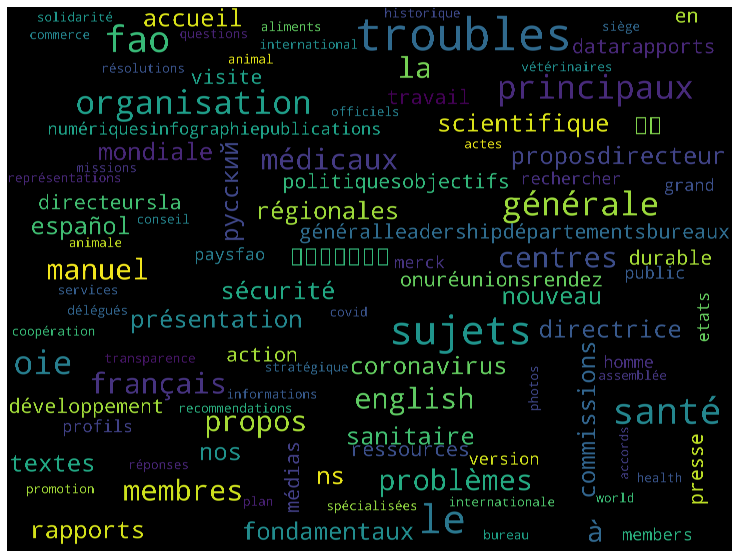

In [60]:
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    width=4000,
    height=3000,
    scale=10,
    max_font_size=250,
    max_words=100,
    background_color="black",
).generate(str(words))
plt.figure(figsize=[35, 10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()